<a href="https://colab.research.google.com/github/cvvarun12/Data-analytics-with-python/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import** **libraries**

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Display settings
sns.set(style="whitegrid")

# **Load** **dataset**

In [2]:
# Upload the Excel file to Colab manually if needed
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_excel("heart_disease_dataset.xlsx")

# Display first few rows
df.head()

Saving heart_disease_dataset.xlsx to heart_disease_dataset.xlsx


,Age,Gender,Cholesterol,Blood_Pressure,Heart_Disease
0,68,Female,170,151/63,0
1,58,Male,179,173/60,1
2,44,Male,246,178/108,1
3,72,Male,177,175/99,0
4,37,Female,260,102/91,0


# **Data** **cleaning**

In [3]:
# Check for null values
print("Null values:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)

# Convert Blood_Pressure to two numeric features: Systolic and Diastolic
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood_Pressure'].str.split('/', expand=True).astype(int)

# Drop original Blood_Pressure column
df.drop(columns=['Blood_Pressure'], inplace=True)

# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Final data preview
df.head()

Null values:
 Age               0
Gender            0
Cholesterol       0
Blood_Pressure    0
Heart_Disease     0
dtype: int64

Data types:
 Age                int64
Gender            object
Cholesterol        int64
Blood_Pressure    object
Heart_Disease      int64
dtype: object


,Age,Gender,Cholesterol,Heart_Disease,Systolic_BP,Diastolic_BP
0,68,0,170,0,151,63
1,58,1,179,1,173,60
2,44,1,246,1,178,108
3,72,1,177,0,175,99
4,37,0,260,0,102,91


# **Exploratory** **data** **analysis (EDA)**

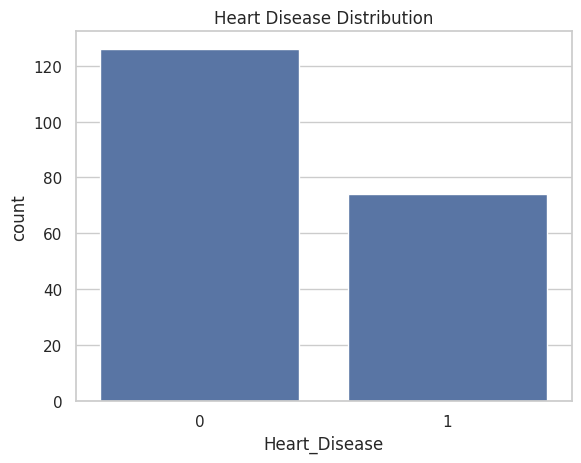

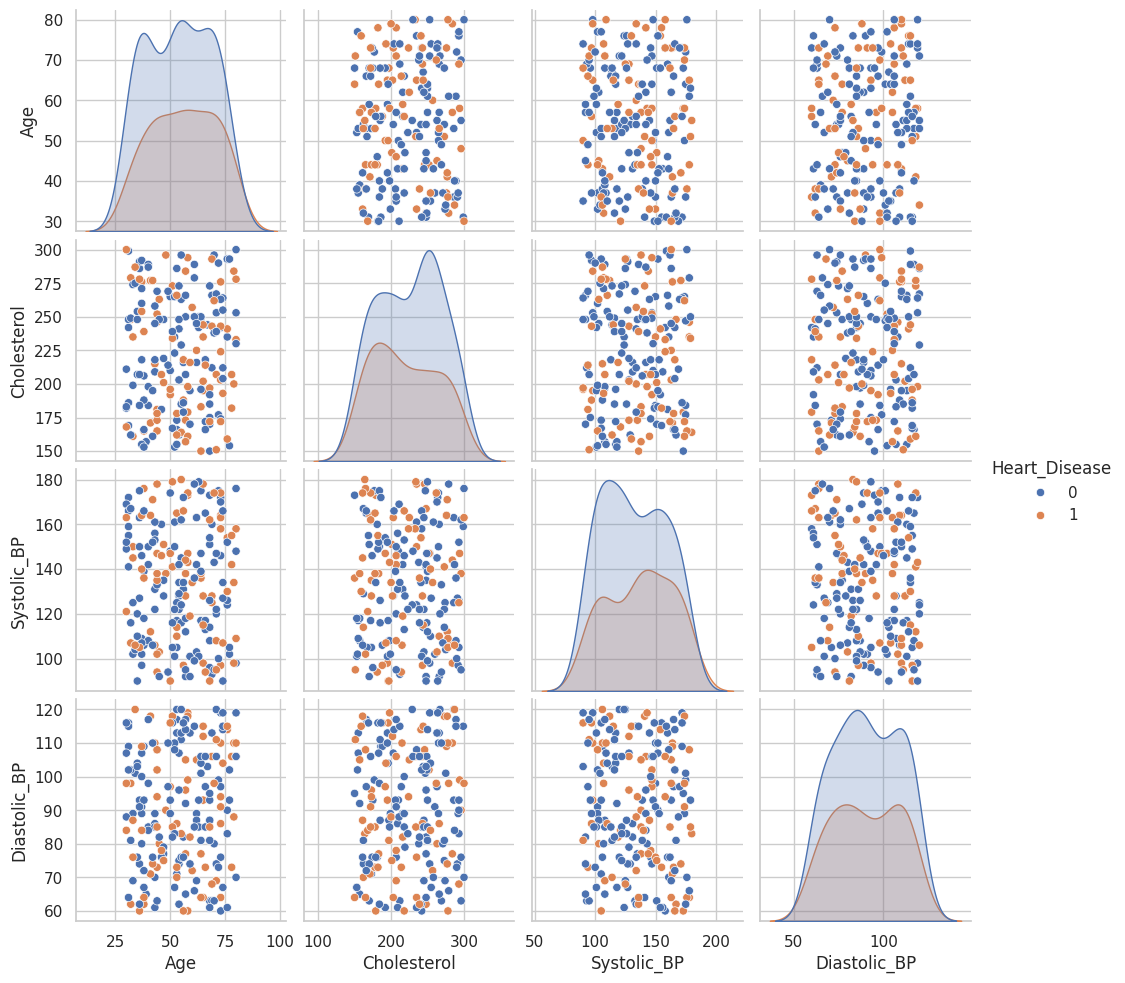

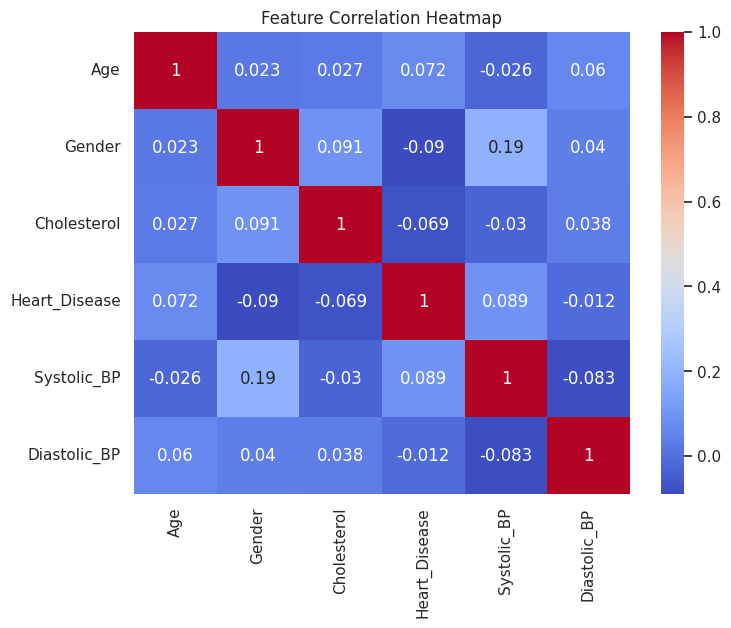

In [4]:
# Plot heart disease distribution
sns.countplot(x='Heart_Disease', data=df)
plt.title("Heart Disease Distribution")
plt.show()

# Pairplot for numerical features
sns.pairplot(df, hue='Heart_Disease', vars=['Age', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP'])
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# **Feature** **scaling** **and** **splitting**

In [5]:
# Define features and target
X = df.drop(columns=['Heart_Disease'])
y = df['Heart_Disease']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Confirm shapes
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (160, 5), Test shape: (40, 5)


# **Model** **training**

In [6]:
# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# **Model** **evaluation**

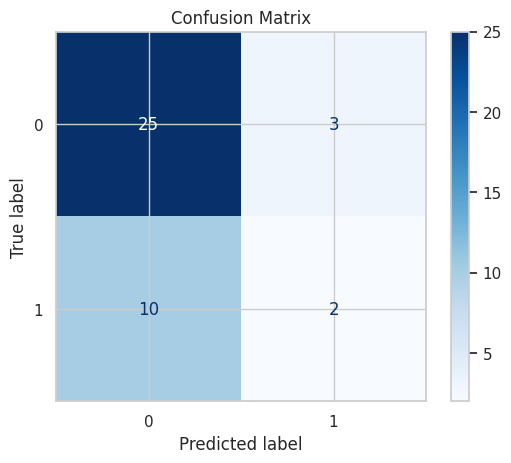

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        28
           1       0.40      0.17      0.24        12

    accuracy                           0.68        40
   macro avg       0.56      0.53      0.51        40
weighted avg       0.62      0.68      0.63        40



In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))